<a href="https://colab.research.google.com/github/Kisame2510/A.I-Training/blob/main/test/4loaibanh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
# https://drive.google.com/drive/folders/1a0LL6pdkq9bpkDDNKavNC3XIp5fYGiGI?usp=sharing
## data

In [54]:
import cv2
import numpy as np
import pandas as pd
import seaborn as ses
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,recall_score,confusion_matrix,classification_report,accuracy_score,f1_score


from keras.layers import Dense, Activation, Dropout, BatchNormalization, LSTM,Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical ,load_img, img_to_array
from tensorflow.keras.optimizers import RMSprop,SGD
from tensorflow.keras.models import load_model
from keras import callbacks
from keras.callbacks import EarlyStopping,ReduceLROnPlateau

import random
import os

In [94]:
image_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)    

train_dataset = image_generator.flow_from_directory(batch_size=10,
                                                 directory='/content/drive/MyDrive/A.I Training data/TEST/train',
                                                 shuffle=True,
                                                 target_size=(150, 150), 
                                                 subset="training",
                                                 class_mode='categorical')

validation_dataset = image_generator.flow_from_directory(batch_size=10,
                                                 directory='/content/drive/MyDrive/A.I Training data/TEST/test',
                                                 shuffle=True,
                                                 target_size=(150, 150), 
                                                 subset="validation",
                                                 class_mode='categorical')

Found 64 images belonging to 4 classes.
Found 8 images belonging to 4 classes.


In [97]:
model = Sequential()
model.add(Conv2D(32,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(150,150,3)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(128, activation = 'relu', kernel_initializer='he_uniform'))
model.add(Dense(128, activation = 'relu', kernel_initializer='he_uniform'))
model.add(Dense(128, activation = 'relu', kernel_initializer='he_uniform'))
model.add(Dense(128, activation = 'relu', kernel_initializer='he_uniform'))
model.add(Dense(4,activation='softmax'))

opt = SGD(learning_rate = 0.001, momentum = 0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

In [98]:
history=model.fit(train_dataset,batch_size=32,epochs=30,verbose=1,validation_data=validation_dataset)

Epoch 1/30
7/7 [==============================] - 8s 1s/step - loss: 1.7669 - accuracy: 0.2969 - val_loss: 2.2569 - val_accuracy: 0.2500
Epoch 2/30
7/7 [==============================] - 8s 1s/step - loss: 1.4951 - accuracy: 0.3125 - val_loss: 1.4368 - val_accuracy: 0.1250
Epoch 3/30
7/7 [==============================] - 8s 1s/step - loss: 1.2978 - accuracy: 0.2500 - val_loss: 1.3594 - val_accuracy: 0.2500
Epoch 4/30
7/7 [==============================] - 8s 1s/step - loss: 1.1622 - accuracy: 0.3906 - val_loss: 1.2618 - val_accuracy: 0.2500
Epoch 5/30
7/7 [==============================] - 8s 1s/step - loss: 1.0700 - accuracy: 0.5625 - val_loss: 1.9644 - val_accuracy: 0.2500
Epoch 6/30
7/7 [==============================] - 8s 1s/step - loss: 1.2025 - accuracy: 0.4531 - val_loss: 1.2007 - val_accuracy: 0.5000
Epoch 7/30
7/7 [==============================] - 8s 1s/step - loss: 0.7573 - accuracy: 0.6875 - val_loss: 0.9355 - val_accuracy: 0.5000
Epoch 8/30
7/7 [=========================

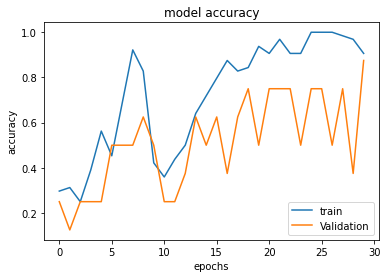

In [99]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','Validation'])
plt.show()

In [100]:
train_dataset.classes
train_dataset.class_indices

{'banhdalon': 0, 'banhhoi': 1, 'banhuot': 2, 'banhxeo': 3}

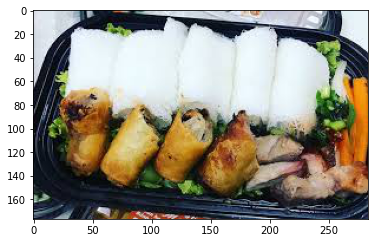

2

In [101]:
filename = '/content/banhhoi.jpg'

img = mpimg.imread(filename)
imgplot = plt.imshow(img)
plt.show()

img = load_img(filename,target_size = (150,150))
img = img_to_array(img)
img =  img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img))

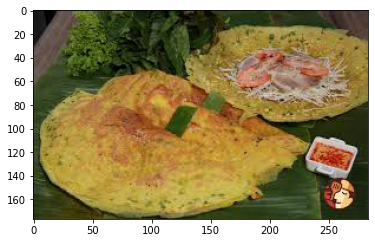

3

In [102]:
filename = '/content/banhxeo.jpg'

img = mpimg.imread(filename)
imgplot = plt.imshow(img)
plt.show()

img = load_img(filename,target_size = (150,150))
img = img_to_array(img)
img =  img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img))